# Tutorial: Tensorflow and Keras 
## CS175 Discussion #6,  Feb. 14th, 2018
Author: [Eric Nalisnick](http://www.ics.uci.edu/~enalisni/)

### Goals of this Lesson
- Introduce...
    - Word Embeddings
    - Gensim
    
- Implement... 
    - Word2Vec

### References 
- [Word Embeddings with Gensim](https://www.kaggle.com/emannueloc/using-word-embeddings-with-gensim)
- [Word2Vec Tutorial --- Part #1](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
- [Word2Vec Tutorial --- Part #2](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)

## 0.  Python Preliminaries
As usual, first we need to import Numpy, Pandas, MatPlotLib...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [85]:
from nltk.tokenize import sent_tokenize, word_tokenize

with open('data/moby_dick.txt', 'r') as f:
    moby_dick_text = f.read()
    
mb_sentences = sent_tokenize(moby_dick_text)
mb_sentences = [word_tokenize(s.lower().replace('\n',' ').replace('--',' ').strip('.?"!')) for s in mb_sentences]

In [182]:
print(mb_sentences[2])

['some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'i', 'thought', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world']


In [148]:
from gensim.models import Word2Vec

model = Word2Vec(mb_sentences, size=30, window=7, min_count=5, workers=4, sorted_vocab=1)
vectors = model.wv

del model

In [153]:
vectors.most_similar('ship')

[('head', 0.9954237937927246),
 ('boat', 0.9936793446540833),
 ('sea', 0.9909812211990356),
 ('side', 0.9906264543533325),
 ('from', 0.9887865781784058),
 ('on', 0.9872192740440369),
 ('over', 0.9866753816604614),
 ('into', 0.9818399548530579),
 ('plank', 0.9817580580711365),
 ('upon', 0.9812248349189758)]

In [178]:
from sklearn.manifold import TSNE

words = [w for w in model.wv.vocab]
vecs_sample = [vectors[w] for w in words[:500]]

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_vecs = tsne_model.fit_transform(vecs_sample)

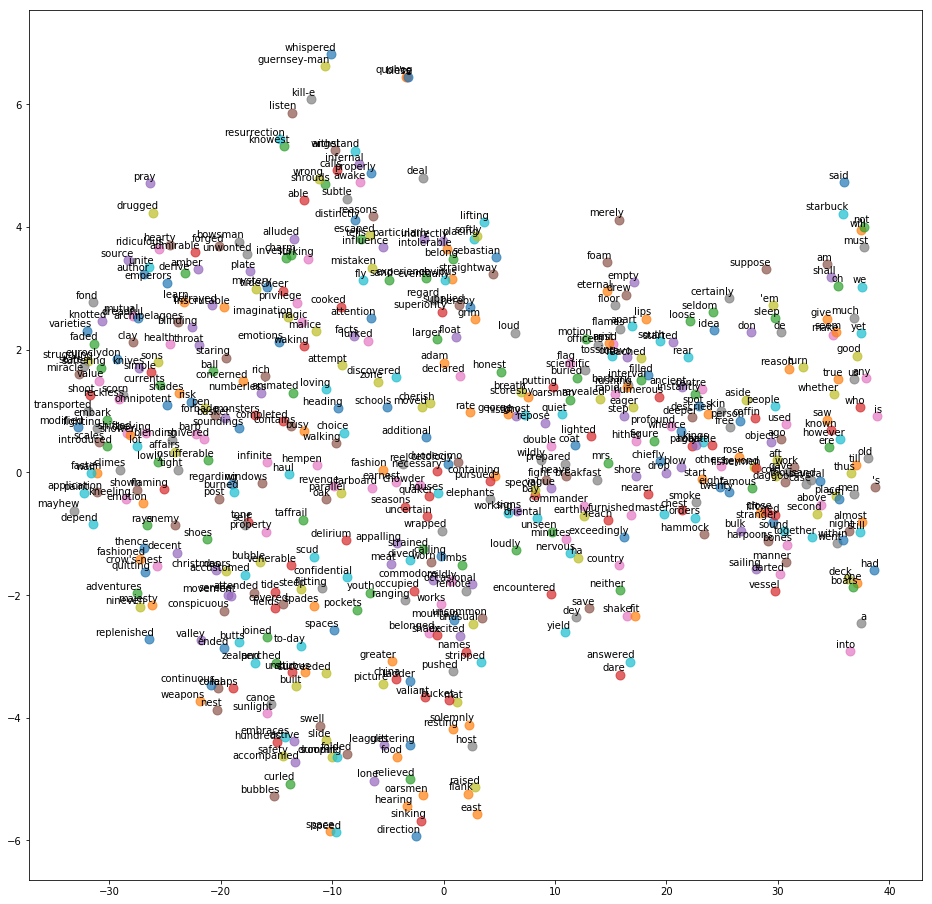

In [180]:
x = []
y = []
for vec in new_vecs:
    x.append(vec[0])
    y.append(vec[1])
        
plt.figure(figsize=(16, 16)) 
        
for i in range(len(x)):
    plt.scatter(x[i],y[i], s=80, alpha=.7)
    plt.annotate(words[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom'
                )
plt.show()

In [194]:
from gensim.models import KeyedVectors

glove_vectors = KeyedVectors.load_word2vec_format('trained_models/glove_50d_vecs.txt', binary=False)

In [195]:
glove_vectors.most_similar('ship')

[('vessel', 0.9361510276794434),
 ('ships', 0.9018164277076721),
 ('boat', 0.8901503682136536),
 ('aboard', 0.8417961001396179),
 ('cargo', 0.8255339860916138),
 ('vessels', 0.8204752206802368),
 ('boats', 0.819223165512085),
 ('submarine', 0.8171239495277405),
 ('freighter', 0.8126896619796753),
 ('fleet', 0.7892956137657166)]

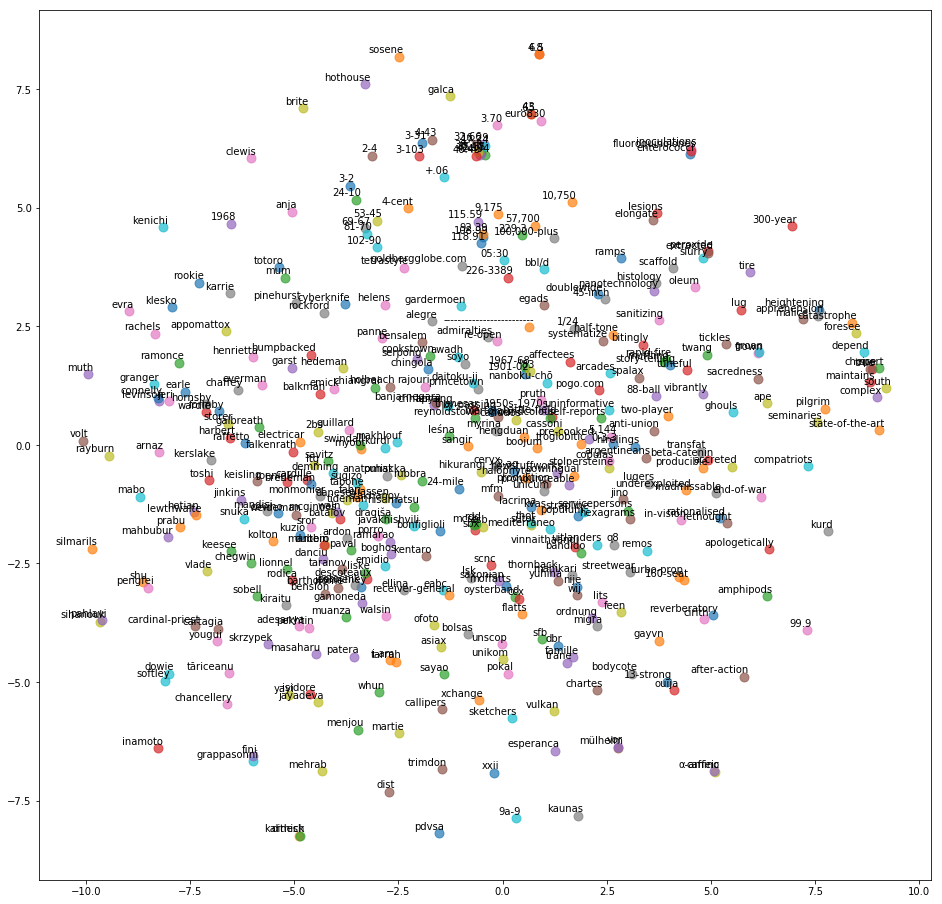

In [197]:
from sklearn.manifold import TSNE

words = [w for w in glove_vectors.vocab]
vecs_sample = [glove_vectors[w] for w in words[:400]]

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_vecs = tsne_model.fit_transform(vecs_sample)

x = []
y = []
for vec in new_vecs:
    x.append(vec[0])
    y.append(vec[1])
        
plt.figure(figsize=(16, 16)) 
        
for i in range(len(x)):
    plt.scatter(x[i],y[i], s=80, alpha=.7)
    plt.annotate(words[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom'
                )
plt.show()